In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [62]:
pd.set_option('display.max_columns', None)

We want to uderstand which type of bird caused to birdstrike in each month in 2010

In [22]:
df_cleaned_2010 = pd.read_csv('df_cleaned_2010.csv')
df_cleaned_2010 = df_cleaned_2010.drop(df_cleaned_2010.columns[0], axis=1)

In [30]:
demo = pd.read_csv('df_cleaned_2010.csv')

In [42]:
pd.set_option('display.max_rows', None)

First we group by Incident Month and Species Name columns

In [128]:
by_month_species = demo.groupby(['Incident Month','Species Name'])['Unnamed: 0'].nunique().reset_index().sort_values(['Incident Month', 'Unnamed: 0'], 
                                                                                                                     ascending = [True, False]).rename(columns={'Unnamed: 0':'bird_count'})

Then we pivot so that Species Name appear as a column (not as a row)

In [65]:
pivoted_df2 = by_month_species.pivot(index='Incident Month', columns='Species Name', values='Unnamed: 0').fillna(0)

In [76]:
pivoted_df2 

Species Name,AMERICAN COOT,AMERICAN CROW,AMERICAN GOLDEN-PLOVER,AMERICAN KESTREL,AMERICAN PIPIT,AMERICAN REDSTART,AMERICAN ROBIN,AMERICAN WHITE PELICAN,AMERICAN WIGEON,AMERICAN WOODCOCK,ANHINGA,ARMADILLO,BALD EAGLE,BANK SWALLOW,BARN OWL,BARN SWALLOW,BARRED OWL,BLACK VULTURE,BLACK-BELLIED PLOVER,BLACK-TAILED JACKRABBIT,BLACK-THROATED BLUE WARBLER,BLACKBIRD,BLUE JAY,BLUE-GRAY GNATCATCHER,BOBOLINK,BRAZILIAN FREE-TAILED BAT,BROAD-WINGED HAWK,BROWN-HEADED COWBIRD,BURROWING OWL,CALIFORNIA GULL,CANADA GOOSE,CANVASBACK,CATTLE EGRET,CAVE SWALLOW,CHESTNUT MUNIA,CHIMNEY SWIFT,CHIPPING SPARROW,CLIFF SWALLOW,COMMON LOON,COMMON MYNA,COMMON NIGHTHAWK,COMMON RAVEN,COMMON TERN,COOPER'S HAWK,COYOTE,DARK-EYED JUNCO,DIAMONDBACK TERRAPIN,DOUBLE-CRESTED CORMORANT,DOVE,DUCK,DUNLIN,EASTERN COTTONTAIL,EASTERN MEADOWLARK,EGRET,EUROPEAN GOLDEN-PLOVER,EUROPEAN STARLING,FALCON,FOX SPARROW,FRANKLIN'S GULL,GADWALL,GEESE,GLAUCOUS GULL,GLAUCOUS-WINGED GULL,GOLDEN EAGLE,GRACKLE,GRAY CATBIRD,GRAY-CHEEKED THRUSH,GREAT BLACK-BACKED GULL,GREAT BLUE HERON,GREAT CRESTED FLYCATCHER,GREAT EGRET,GREAT HORNED OWL,GREAT-TAILED GRACKLE,GREATER SAGE-GROUSE,GREATER WHITE-FRONTED GOOSE,GREEN-WINGED TEAL,GULL,HAWK,HERMIT THRUSH,HERRING GULL,HORNED LARK,HOUSE FINCH,HOUSE SPARROW,KILLDEER,LAPLAND LONGSPUR,LARK BUNTING,LAUGHING GULL,LEAST TERN,LESSER SCAUP,MALLARD,MEADOWLARK,MERLIN,MICROBAT,MOURNING DOVE,MUTE SWAN,NASHVILLE WARBLER,NELSON'S SHARP-TAILED SPARROW,NEW WORLD VULTURES,NORTHERN FLICKER,NORTHERN HARRIER,NORTHERN MOCKINGBIRD,NORTHERN PINTAIL,NORTHERN ROUGH-WINGED SWALLOW,NORTHERN SHOVELER,OSPREY,OVENBIRD,OWLS,PACIFIC GOLDEN-PLOVER,PACIFIC-SLOPE FLYCATCHER,PERCHING BIRDS,PEREGRINE FALCON,"PIGEONS, DOVES",PIPING PLOVER,PLOVERS,PURPLE FINCH,PURPLE MARTIN,RABBIT,RED FOX,RED KNOT,RED-TAILED HAWK,RED-WINGED BLACKBIRD,RING-BILLED GULL,RING-NECKED PHEASANT,ROCK PIGEON,ROCK SANDPIPER,ROSE-BREASTED GROSBEAK,RUDDY DUCK,SANDHILL CRANE,SANDPIPER,SAVANNAH SPARROW,SCISSOR-TAILED FLYCATCHER,SEMIPALMATED PLOVER,SHORT-EARED OWL,SNOW BUNTING,SNOW GOOSE,SPARROW,SPOTTED DOVE,STRIPED SKUNK,SWAINSON'S HAWK,SWAINSON'S THRUSH,SWALLOW,TERNS,TREE SWALLOW,TUNDRA SWAN,TURKEY VULTURE,UNKNOWN BIRD,UNKNOWN LARGE BIRD,UNKNOWN MEDIUM BIRD,UNKNOWN SMALL BIRD,VEERY,"WAXBILLS, MANNIKINS, PARROTFINCHES",WESTERN GULL,WESTERN KINGBIRD,WESTERN MEADOWLARK,WESTERN SANDPIPER,WHITE-CROWNED SPARROW,WHITE-TAILED DEER,WHITE-THROATED MUNIA,WHITE-THROATED SPARROW,WHITE-THROATED SWIFT,WILD TURKEY,WOOD DUCK,WOODCHUCK,YELLOW-BELLIED SAPSUCKER,ZEBRA DOVE
Incident Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,2.0,10.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,3.0,18.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

There are nearly 165 species name and consequently this much amount of columns. It is difficult to plot all these columns. Therefore, we decided to take 3 columns: UNKNOWN LARGE BIRD, UNKNOWN MEDIUM BIRD, UNKNOWN SMALL BIRD. These types of birds were recorded most in the dataset 

In [83]:
pivoted_df2.columns

Index(['AMERICAN COOT', 'AMERICAN CROW', 'AMERICAN GOLDEN-PLOVER',
       'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART',
       'AMERICAN ROBIN', 'AMERICAN WHITE PELICAN', 'AMERICAN WIGEON',
       'AMERICAN WOODCOCK',
       ...
       'WHITE-CROWNED SPARROW', 'WHITE-TAILED DEER', 'WHITE-THROATED MUNIA',
       'WHITE-THROATED SPARROW', 'WHITE-THROATED SWIFT', 'WILD TURKEY',
       'WOOD DUCK', 'WOODCHUCK', 'YELLOW-BELLIED SAPSUCKER', 'ZEBRA DOVE'],
      dtype='object', name='Species Name', length=165)

In [111]:
pivoted_df = pivoted_df2.drop(pivoted_df2.columns.difference(['UNKNOWN LARGE BIRD', 'UNKNOWN MEDIUM BIRD', 'UNKNOWN SMALL BIRD' ]), 1) 

In [112]:
pivoted_df['Month'] = list(range(1, 13))
import calendar
pivoted_df['Month'] = pivoted_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [114]:
pivoted_df.index = pivoted_df['Month']

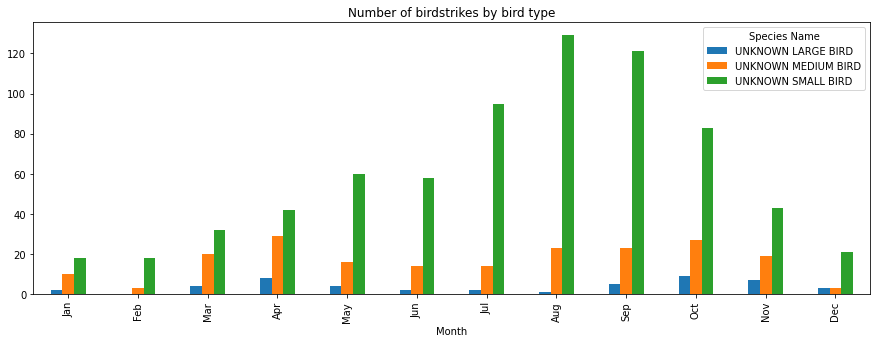

In [122]:
plot = pivoted_df.plot(kind='bar', figsize=(15,5), title='Number of birdstrikes by bird type')

We can see that overall, UNKNOWN SMALL BIRD was detected most in all the months. UNKNOWN LARGE BIRD was detected significantly fewer times than UNKNOWN MEDIUM BIRD. In February and in 3 months of summer, UNKNOWN LARGE BIRD was almost not detected. However, in December UNKNOWN MEDIUM BIRD and UNKNOWN LARGE BIRD was detected in the equal amount. 

This phenomenon may be explained by the migration habits of large, medium and small birds. The further research shows whether this statement is true or not. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [62]:
pd.set_option('display.max_columns', None)

We want to uderstand which type of bird caused to birdstrike in each month in 2010

In [22]:
df_cleaned_2010 = pd.read_csv('df_cleaned_2010.csv')
df_cleaned_2010 = df_cleaned_2010.drop(df_cleaned_2010.columns[0], axis=1)

In [30]:
demo = pd.read_csv('df_cleaned_2010.csv')

In [42]:
pd.set_option('display.max_rows', None)

First we group by Incident Month and Species Name columns

In [128]:
by_month_species = demo.groupby(['Incident Month','Species Name'])['Unnamed: 0'].nunique().reset_index().sort_values(['Incident Month', 'Unnamed: 0'], 
                                                                                                                     ascending = [True, False]).rename(columns={'Unnamed: 0':'bird_count'})

Then we pivot so that Species Name appear as a column (not as a row)

In [65]:
pivoted_df2 = by_month_species.pivot(index='Incident Month', columns='Species Name', values='Unnamed: 0').fillna(0)

In [76]:
pivoted_df2 

Species Name,AMERICAN COOT,AMERICAN CROW,AMERICAN GOLDEN-PLOVER,AMERICAN KESTREL,AMERICAN PIPIT,AMERICAN REDSTART,AMERICAN ROBIN,AMERICAN WHITE PELICAN,AMERICAN WIGEON,AMERICAN WOODCOCK,ANHINGA,ARMADILLO,BALD EAGLE,BANK SWALLOW,BARN OWL,BARN SWALLOW,BARRED OWL,BLACK VULTURE,BLACK-BELLIED PLOVER,BLACK-TAILED JACKRABBIT,BLACK-THROATED BLUE WARBLER,BLACKBIRD,BLUE JAY,BLUE-GRAY GNATCATCHER,BOBOLINK,BRAZILIAN FREE-TAILED BAT,BROAD-WINGED HAWK,BROWN-HEADED COWBIRD,BURROWING OWL,CALIFORNIA GULL,CANADA GOOSE,CANVASBACK,CATTLE EGRET,CAVE SWALLOW,CHESTNUT MUNIA,CHIMNEY SWIFT,CHIPPING SPARROW,CLIFF SWALLOW,COMMON LOON,COMMON MYNA,COMMON NIGHTHAWK,COMMON RAVEN,COMMON TERN,COOPER'S HAWK,COYOTE,DARK-EYED JUNCO,DIAMONDBACK TERRAPIN,DOUBLE-CRESTED CORMORANT,DOVE,DUCK,DUNLIN,EASTERN COTTONTAIL,EASTERN MEADOWLARK,EGRET,EUROPEAN GOLDEN-PLOVER,EUROPEAN STARLING,FALCON,FOX SPARROW,FRANKLIN'S GULL,GADWALL,GEESE,GLAUCOUS GULL,GLAUCOUS-WINGED GULL,GOLDEN EAGLE,GRACKLE,GRAY CATBIRD,GRAY-CHEEKED THRUSH,GREAT BLACK-BACKED GULL,GREAT BLUE HERON,GREAT CRESTED FLYCATCHER,GREAT EGRET,GREAT HORNED OWL,GREAT-TAILED GRACKLE,GREATER SAGE-GROUSE,GREATER WHITE-FRONTED GOOSE,GREEN-WINGED TEAL,GULL,HAWK,HERMIT THRUSH,HERRING GULL,HORNED LARK,HOUSE FINCH,HOUSE SPARROW,KILLDEER,LAPLAND LONGSPUR,LARK BUNTING,LAUGHING GULL,LEAST TERN,LESSER SCAUP,MALLARD,MEADOWLARK,MERLIN,MICROBAT,MOURNING DOVE,MUTE SWAN,NASHVILLE WARBLER,NELSON'S SHARP-TAILED SPARROW,NEW WORLD VULTURES,NORTHERN FLICKER,NORTHERN HARRIER,NORTHERN MOCKINGBIRD,NORTHERN PINTAIL,NORTHERN ROUGH-WINGED SWALLOW,NORTHERN SHOVELER,OSPREY,OVENBIRD,OWLS,PACIFIC GOLDEN-PLOVER,PACIFIC-SLOPE FLYCATCHER,PERCHING BIRDS,PEREGRINE FALCON,"PIGEONS, DOVES",PIPING PLOVER,PLOVERS,PURPLE FINCH,PURPLE MARTIN,RABBIT,RED FOX,RED KNOT,RED-TAILED HAWK,RED-WINGED BLACKBIRD,RING-BILLED GULL,RING-NECKED PHEASANT,ROCK PIGEON,ROCK SANDPIPER,ROSE-BREASTED GROSBEAK,RUDDY DUCK,SANDHILL CRANE,SANDPIPER,SAVANNAH SPARROW,SCISSOR-TAILED FLYCATCHER,SEMIPALMATED PLOVER,SHORT-EARED OWL,SNOW BUNTING,SNOW GOOSE,SPARROW,SPOTTED DOVE,STRIPED SKUNK,SWAINSON'S HAWK,SWAINSON'S THRUSH,SWALLOW,TERNS,TREE SWALLOW,TUNDRA SWAN,TURKEY VULTURE,UNKNOWN BIRD,UNKNOWN LARGE BIRD,UNKNOWN MEDIUM BIRD,UNKNOWN SMALL BIRD,VEERY,"WAXBILLS, MANNIKINS, PARROTFINCHES",WESTERN GULL,WESTERN KINGBIRD,WESTERN MEADOWLARK,WESTERN SANDPIPER,WHITE-CROWNED SPARROW,WHITE-TAILED DEER,WHITE-THROATED MUNIA,WHITE-THROATED SPARROW,WHITE-THROATED SWIFT,WILD TURKEY,WOOD DUCK,WOODCHUCK,YELLOW-BELLIED SAPSUCKER,ZEBRA DOVE
Incident Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,2.0,10.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0.0,0.0,3.0,18.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

There are nearly 165 species name and consequently this much amount of columns. It is difficult to plot all these columns. Therefore, we decided to take 3 columns: UNKNOWN LARGE BIRD, UNKNOWN MEDIUM BIRD, UNKNOWN SMALL BIRD. These types of birds were recorded most in the dataset 

In [83]:
pivoted_df2.columns

Index(['AMERICAN COOT', 'AMERICAN CROW', 'AMERICAN GOLDEN-PLOVER',
       'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART',
       'AMERICAN ROBIN', 'AMERICAN WHITE PELICAN', 'AMERICAN WIGEON',
       'AMERICAN WOODCOCK',
       ...
       'WHITE-CROWNED SPARROW', 'WHITE-TAILED DEER', 'WHITE-THROATED MUNIA',
       'WHITE-THROATED SPARROW', 'WHITE-THROATED SWIFT', 'WILD TURKEY',
       'WOOD DUCK', 'WOODCHUCK', 'YELLOW-BELLIED SAPSUCKER', 'ZEBRA DOVE'],
      dtype='object', name='Species Name', length=165)

In [111]:
pivoted_df = pivoted_df2.drop(pivoted_df2.columns.difference(['UNKNOWN LARGE BIRD', 'UNKNOWN MEDIUM BIRD', 'UNKNOWN SMALL BIRD' ]), 1) 

In [112]:
pivoted_df['Month'] = list(range(1, 13))
import calendar
pivoted_df['Month'] = pivoted_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [114]:
pivoted_df.index = pivoted_df['Month']

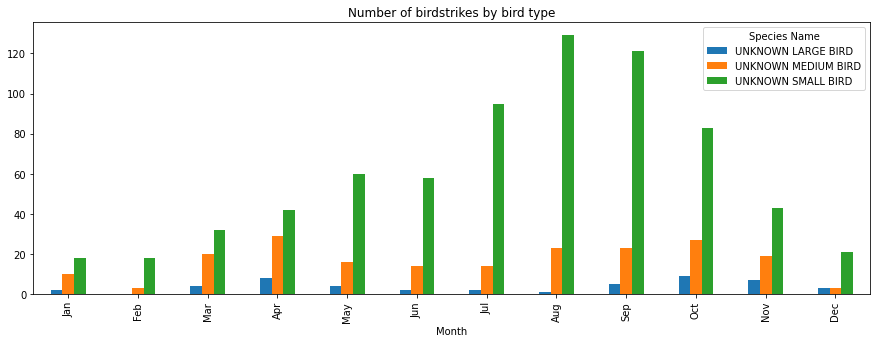

In [122]:
plot = pivoted_df.plot(kind='bar', figsize=(15,5), title='Number of birdstrikes by bird type')

We can see that overall, UNKNOWN SMALL BIRD was detected most in all the months. UNKNOWN LARGE BIRD was detected significantly fewer times than UNKNOWN MEDIUM BIRD. In February and in 3 months of summer, UNKNOWN LARGE BIRD was almost not detected. However, in December UNKNOWN MEDIUM BIRD and UNKNOWN LARGE BIRD was detected in the equal amount. 

This phenomenon may be explained by the migration habits of large, medium and small birds. The further research shows whether this statement is true or not. 